<a href="https://colab.research.google.com/github/heitor-eng/H_Data_Science/blob/master/Machine_Learning_Project_LREN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the future price of the Lojas Renner S.A. (LREN3.SA) with Machine Learning

---


This is a project which I am using the Linear Regression method to predict the future price of the paper for Lojas Renner S.A. (LREN3.SA)



###LREN3.SA



<p align=center>
<img src="https://github.com/heitor-eng/H_Data_Science/blob/master/Imagens/stock-market-g69876065d_1920.jpg?raw=true" width="50%"></p>

The dataset was take from the web page of [Yahoo Finance - Lojas Renner S.A.](https://br.financas.yahoo.com/quote/LREN3.SA/history?p=LREN3.SA)

In [ ]:
# Description: Predict the future price of the LREN3.SA csv

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')

In [ ]:
# Load the dataset
from google.colab import files
files.upload()

In [ ]:
# Store the data
df = pd.read_csv('LREN3.SA.csv',index_col="Date",parse_dates = True)

# Show the data
print('The number of rows: ',df.shape[0])
print("And the columns are: ", df.shape[1])

# The head of the dataset
df.head()

The number of rows:  249
And the columns are:  6


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-29,36.418182,37.072727,35.890907,36.336365,35.695343,8683620
2021-04-30,36.727272,37.954544,36.218182,36.727272,36.118065,25368970
2021-05-03,36.799999,37.672726,36.409088,37.272728,36.654472,15702500
2021-05-04,37.327271,37.818180,36.809090,37.354546,36.734932,24260610
2021-05-05,37.500000,38.918182,37.299999,37.627274,37.003139,15809530


In [ ]:
#the most recently datas
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-26,24.870001,25.75,24.27,24.459999,24.459999,15031700
2022-04-27,24.900000,25.32,24.16,24.530001,24.530001,25730500
2022-04-28,0.000000,0.00,0.00,24.389999,24.389999,0


In [ ]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

## Linear Regression

Is one of the two most famous Machine Learning Algorithms which come under supervised learning techniques. Since this algorithm is supervised in nature hence this algorithm use labeled datasets to make the predictions.

It is one of the most simple Machine learning algorithm that comes under Supervised Learning technique and used for solving regression problems.

The goal of linear regression is to find the best fit line that can accurately predict the output for the continuous dependent variable. And it is used for predicting the continuous dependent variable with the help of independent variables, such as price, age, salary, etc.

**Source**: [Javatpoint](https://www.javatpoint.com/linear-regression-vs-logistic-regression-in-machine-learning)

In [ ]:
# Copy the dataframe
df2 = df.copy()

In [ ]:
# Create a new column called "Numbers"  that ranges from 0 to the lenght of the data set
df2["Numbers"] = list(range(0,len(df2)))

In [ ]:
# Store the "Numbers" column into a variable called 'X' as an array
X = np.array(df2[["Numbers"]])

In [ ]:
df2.tail()

,Open,High,Low,Close,Adj Close,Volume,Numbers
Date,,,,,,,
2022-04-22,25.400000,25.610001,24.700001,25.020000,25.020000,11626100,244
2022-04-25,24.670000,25.160000,24.320000,25.000000,25.000000,10646500,245
2022-04-26,24.870001,25.750000,24.270000,24.459999,24.459999,15031700,246
2022-04-27,24.900000,25.320000,24.160000,24.530001,24.530001,25730500,247
2022-04-28,0.000000,0.000000,0.000000,24.389999,24.389999,0,248


> This was just a step to be done, so now I can format the data properly to int into our model for training.

In [ ]:
# Store the 'Close' price as an array in a variable called 'y'
y = df2['Close'].values

In [ ]:
# Create and train the model
lin_model = LinearRegression().fit(X,y)

> `fit()` it is just another term for a train method.

In [ ]:
print('Intercept:',lin_model.intercept_)
print('Slope:',lin_model.coef_)

Intercept: 42.02249879431325
Slope: [-0.08074416]


Equation of the line:

> $y = m.x +b$

Where:

* m : Slope of the line

* b : Intercept of the line

In [ ]:
# Prepare the data for visualization
# get the predicted price from the model and store them into a variable called y_pred
# Equation of the line y = m*x + b
y_pred = lin_model.coef_ * X + lin_model.intercept_

In [ ]:
# Store the predict values in a new column called Pred
df2['Pred'] = y_pred

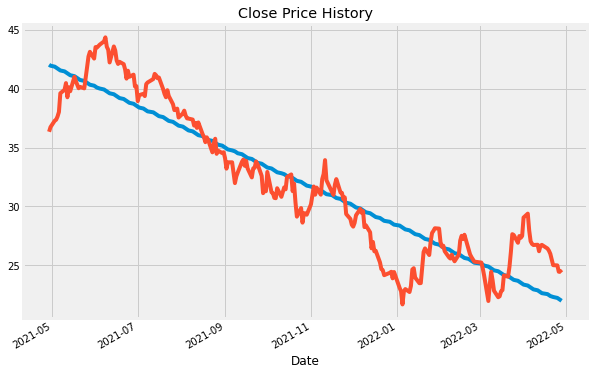

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize =(9,6),dpi = 72)
df2["Pred"].plot()
df2['Close'].plot()
plt.title('Close Price History')

plt.show()

## First impression

As the chart shows, the values of the column `df2['Close']` (red line) has high variance and the reason for that is the variantion of the price, maybe some news and the results of the company.

We can interpret that because the red line has a lot of points that had a good amount of distance from the blue line, which is the column `df2['Pred']` meaning a high variance. To determine if the result is good or bad, we have the metrics of the model, these metrics help us to see the performance of the model and for each type of machine learning model or algorithm we have the metrics whose is better to show the accuracy of the model. 

### R² (coefficiente of determination):

The coefficiente of determination or R² score helps to show the model's goodness of fit or how well the model fits the data right the way.

The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It is pronounced as R squared and is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset. Simply put, it is the difference between the samples in the dataset and the predictions made by the model.

**Source**: [R² score](https://thecleverprogrammer.com/2021/06/22/r2-score-in-machine-learning/)

In [ ]:
# How good is the model?
r2_score(df2['Close'],df2['Pred'])

0.8483346350287609

In [ ]:
# Show the possible price fot the nest day based on the model
lin_model.coef_*len(df2) + 1 + lin_model.intercept_

array([22.91720179])

## Conclusion:

The model works pretty well, as the `r2_score` result, shows the model as an 84% of probability being right at the future price of the stock LRN3. 
